# Machine Learning (Summer 2018)

## Homework 4

- Implement possibilistic
K-means

or

-  Implement Fuzzy C-means

not sure which one should I do so I am
goind to implement both.

#### Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets as ds
from copy import deepcopy
from sklearn.neighbors import DistanceMetric
sns.set()

#### Loading dataset

In [2]:
dataset = pd.read_csv('datasets/xclara.csv')
dataset.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


#### Implementing K-means

In [29]:
class KMeans:
    
    def __init__(self, clusters: int = 8, max_iterations: int = 1000):
        self.clusters = clusters
        self.max_iterations = max_iterations
        self.tol = 1e-5

    def get_distances(self, a, b, axis=0):
        return np.linalg.norm(a - b, axis=axis) ** 2
        
    def get_initial_centroids(self, X):
        random_index = np.random.randint(0, len(X))
        initial_centroid = X[random_index]
        reduced_X = np.delete(X, random_index, 0)
        centroids = [initial_centroid]
        for cluster in range(self.clusters - 1):
            dists = self.get_distances(centroids[cluster], X)
            dists = dists/np.sum(dists)
            random_index = np.random.choice(len(dists), p=dists)
            centroids.append(reduced_X[random_index])
            reduced_X = np.delete(reduced_X, random_index, 0)
        return np.array(centroids)
            
    def fit(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        self.centroids = self.get_initial_centroids(X)
        for _ in range(self.max_iterations):
            distances = np.array([
                            self.get_distances(X, centroid, axis=1) 
                            for centroid in self.centroids
                        ])
            assignment_array = np.argmin(distances, axis=0)
            masks = np.array([
                        np.equal(assignment_array, cluster)
                        for cluster in np.unique(assignment_array)
                    ])
            new_centroids = np.array([
                                np.mean(X[mask], axis=0)
                                for mask in masks
                            ])
            centroid_distances = self.get_distances(self.centroids, new_centroids, axis=-1)
            if centroid_distances.all() < self.tol:
                return
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([
                        self.get_distances(centroid, X, axis=1) 
                        for centroid in self.centroids
                    ])
        return np.argmin(distances, axis=0)

#### Training `KMeans` model and predicting on the same dataset.

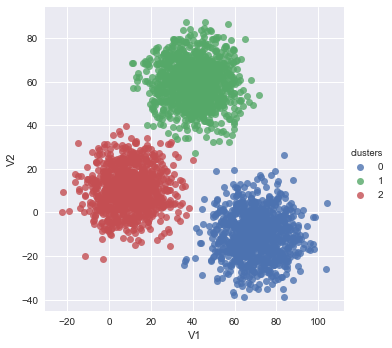

In [4]:
k_means_dataset = deepcopy(dataset)
k_means = KMeans(clusters=3)
k_means.fit(k_means_dataset)
clusters = k_means.predict(k_means_dataset)
k_means_dataset['clusters'] = clusters
sns.lmplot(x='V1', y='V2', hue='clusters', data=k_means_dataset, fit_reg=False)

#### Implementing C-means

In [27]:
class CMeans:
    
    def __init__(self, clusters: int = 8, fuzzifier: float = 2.5, max_iterations: int = 1000):
        self.clusters = clusters 
        self.fuzzifier = fuzzifier
        self.max_iterations = max_iterations
        self.tol = 1e-5

    def get_distances(self, a, b, axis=0):
        return np.linalg.norm(a - b, axis=axis) ** 2
        
    def get_initial_centroids(self, X):
        random_index = np.random.randint(0, len(X))
        initial_centroid = X[random_index]
        reduced_X = np.delete(X, random_index, 0)
        centroids = [initial_centroid]
        for cluster in range(self.clusters - 1):
            dists = self.get_distances(centroids[cluster], X)
            dists = dists/np.sum(dists)
            random_index = np.random.choice(len(dists), p=dists)
            centroids.append(reduced_X[random_index])
            reduced_X = np.delete(reduced_X, random_index, 0)
        return np.array(centroids)
            
    def fit(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        self.centroids = self.get_initial_centroids(X)
        for _ in range(self.max_iterations):
            distances = np.array([
                            self.get_distances(X, centroid, axis=1) 
                            for centroid in self.centroids
                        ])
            cluster_probabilities = distances / np.sum(distances, axis=0)
            new_centroids = np.dot(cluster_probabilities**self.fuzzifier, X)/cluster_probabilities.shape[1]
            centroid_distances = self.get_distances(self.centroids, new_centroids, axis=-1)
            if centroid_distances.all() < self.tol:
                return
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([
                        self.get_distances(centroid, X, axis=1) 
                        for centroid in self.centroids
                    ])
        probs = distances / np.sum(distances, axis=0)
        return np.argmax(probs, axis=0)

#### Training `CMeans` model and predicting on the same dataset.

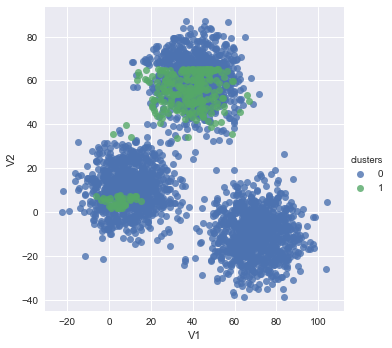

In [28]:
c_means_data = deepcopy(dataset)
c_means = CMeans(clusters=3)
c_means.fit(c_means_data)
clusters = c_means.predict(c_means_data)
c_means_data['clusters'] = clusters
sns.lmplot(x='V1', y='V2', hue='clusters', data=c_means_data, fit_reg=False)